## Machine Learning Foundations
# Supervised Machine Learning - Regression
Sumudu Tennakoon, PhD
<hr/>

To learn more about Python, refer to the following websites

* Python : www.python.org

To learn more about the Python packages we explore in this notebook, refer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/
* StatsModel : https://www.statsmodels.org

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Polynomial Regression

## 1.1 Generate Dataset

In [2]:
x = np.random.normal(0, 1, 25)
print(F"x = {x}")

x = [ 1.79986881 -2.53178733  0.27114437 -0.52434009 -0.06768238 -0.57292508
 -1.09221889  0.16897781 -0.4914365   0.71800008  0.29510871 -0.66145246
  0.52139542  0.47918601  0.95236559  0.32937183  0.594706    2.47688437
  1.15124888  0.18663308  1.20263144 -1.57620623  1.28972364 -0.33456092
 -1.07905791]


In [3]:
y = 3.14 + 0.5*x + 2*(x**2) - 1.5*(x**3) + np.random.normal(-1, 1, 25)
print(F"y = {y}")

y = [-0.44685278 38.32593311  3.44344222  3.24865153  1.58499755  5.50658446
  5.62304258  3.5859249   1.45283489  1.214716    3.64947097  0.94529228
  1.66749933  1.62116016  1.89929089  3.74814106  3.62335698 -6.11844771
  3.88007876  1.69334074  1.88630275  9.56882396  2.29310959  2.33176949
  5.44839264]


In [4]:
data = pd.DataFrame(data={"x":x, "y":y})
data

,x,y
0,1.799869,-0.446853
1,-2.531787,38.325933
2,0.271144,3.443442
3,-0.524340,3.248652
4,-0.067682,1.584998
5,-0.572925,5.506584
6,-1.092219,5.623043
7,0.168978,3.585925
8,-0.491437,1.452835
9,0.718000,1.214716


<AxesSubplot:xlabel='x', ylabel='y'>

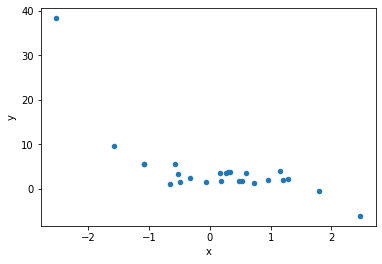

In [5]:
data.plot(x="x", y="y", kind="scatter")

## 1.2 Fit a Linear Regression to Data

In [6]:
from sklearn.linear_model import LinearRegression

X = data[['x']]
y = data['y']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

data['y_pred'] = y_pred

data.head()

,x,y,y_pred
0,1.799869,-0.446853,-4.126775
1,-2.531787,38.325933,17.259077
2,0.271144,3.443442,3.420702
3,-0.524340,3.248652,7.348094
4,-0.067682,1.584998,5.093526


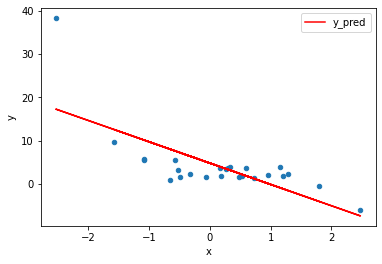

In [7]:
f,ax0 = plt.subplots()
#ax1 = ax0.twinx()

data.plot(x='x', y='y', kind='scatter', ax=ax0)
data.plot(x='x', y='y_pred', kind='line', c='red', ax=ax0)

plt.show()

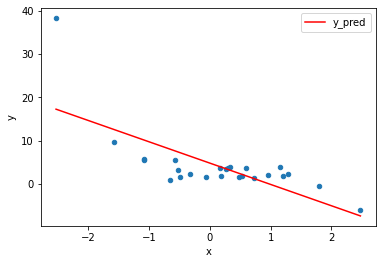

In [8]:
f,ax0 = plt.subplots()
#ax1 = ax0.twinx()

data.plot(x='x', y='y', kind='scatter', ax=ax0)
data.sort_values(by='x').plot(x='x', y='y_pred', kind='line', c='red', ax=ax0) # sort datapoints

plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate
mse = mean_squared_error(data['y'], data['y_pred'])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(data['y'], data['y_pred'])
print("R2:", r2)

MSE: 28.14080676286933
RMSE: 5.3047909254625045
R2: 0.4975298446499077


## 1.3 Apply Polynomial Transformation (Degree = 3)

### Generate Polynomial Features

$ y = a_0 + a_1*x + a_2*x^2 + a_3*x^3 $

In [10]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=3)

transformed_data = polynomial_features.fit_transform(data[["x"]])
transformed_data = pd.DataFrame(data=transformed_data, columns=['x0', 'x1', 'x2', 'x3'])
transformed_data.head()

,x0,x1,x2,x3
0,1.0,1.799869,3.239528,5.830725
1,1.0,-2.531787,6.409947,-16.228623
2,1.0,0.271144,0.073519,0.019934
3,1.0,-0.524340,0.274933,-0.144158
4,1.0,-0.067682,0.004581,-0.000310


###  Concatanate transformed data with Orginal Dataset

In [11]:
data = pd.concat([data, transformed_data], axis=1)

data[['x', 'x0', 'x1', 'x2', 'x3', 'y']].head()

,x,x0,x1,x2,x3,y
0,1.799869,1.0,1.799869,3.239528,5.830725,-0.446853
1,-2.531787,1.0,-2.531787,6.409947,-16.228623,38.325933
2,0.271144,1.0,0.271144,0.073519,0.019934,3.443442
3,-0.524340,1.0,-0.524340,0.274933,-0.144158,3.248652
4,-0.067682,1.0,-0.067682,0.004581,-0.000310,1.584998


### Fit Linear Regression Model

$ y = a_0 + a_1*x + a_2*x^2 + a_3*x^3 $

$ y = a_0 + a_1*x_1 + a_2*x_2 + a_3*x_3 $

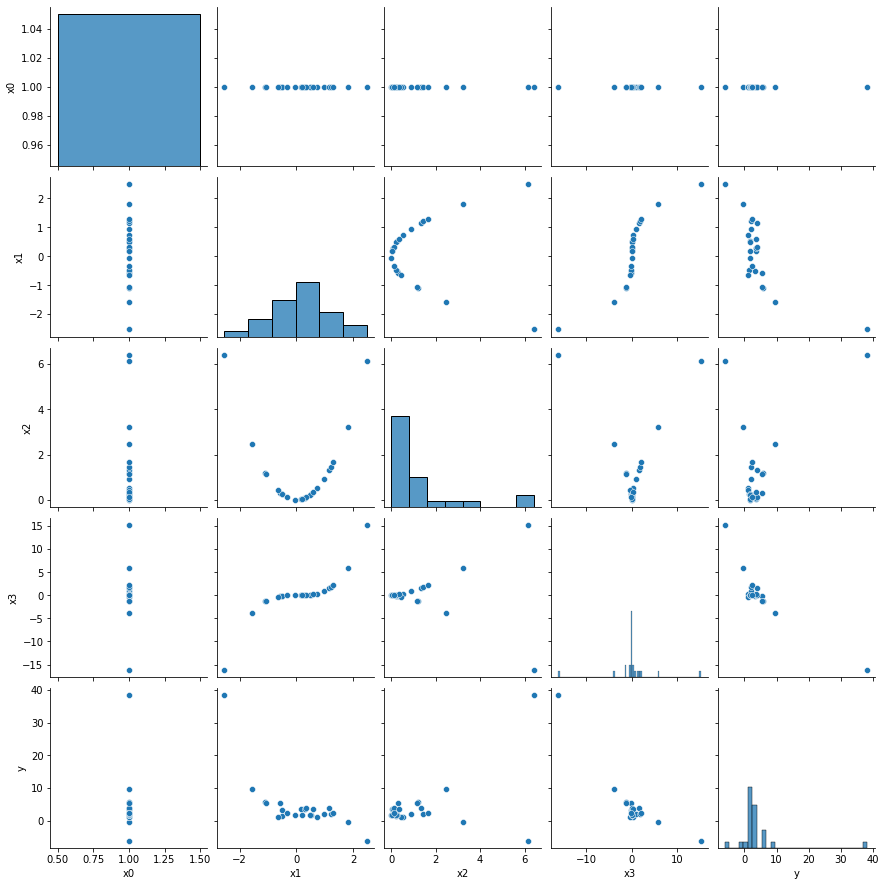

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['x0', 'x1', 'x2', 'x3', 'y']] )
plt.show()

### Select Features (X) and Target (y)

In [13]:
X = data[['x1', 'x2', 'x3']] 
y = data['y']

### Train Model

In [14]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

### Predict

In [15]:
y_pred = model.predict(X)

data['y_pred'] = y_pred

data[['x1', 'x2', 'x3', 'y', 'y_pred']] .head()

,x1,x2,x3,y,y_pred
0,1.799869,3.239528,5.830725,-0.446853,0.663564
1,-2.531787,6.409947,-16.228623,38.325933,37.385593
2,0.271144,0.073519,0.019934,3.443442,2.223591
3,-0.524340,0.274933,-0.144158,3.248652,2.478602
4,-0.067682,0.004581,-0.000310,1.584998,1.952495


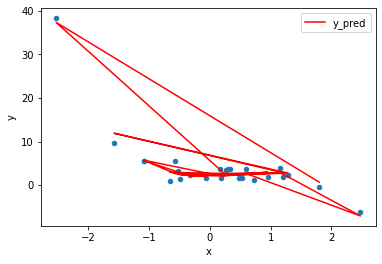

In [16]:
f,ax0 = plt.subplots()
#ax1 = ax0.twinx()

data.plot(x='x', y='y', kind='scatter', ax=ax0)
data.plot(x='x', y='y_pred', kind='line', c='red', ax=ax0)

plt.show()

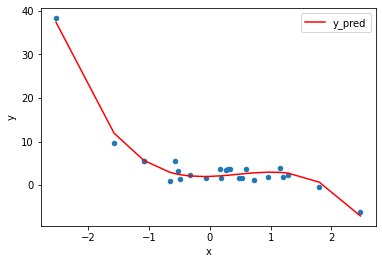

In [17]:
f,ax0 = plt.subplots()
#ax1 = ax0.twinx()

data.plot(x='x', y='y', kind='scatter', ax=ax0)
data.sort_values(by='x').plot(x='x', y='y_pred', kind='line', c='red', ax=ax0) # sort datapoints

plt.show()

### Evaluate

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate
mse = mean_squared_error(data['y'], data['y_pred'])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(data['y'], data['y_pred'])
print("R2:", r2)

MSE: 1.547570286269775
RMSE: 1.2440137805787261
R2: 0.9723672498549977


## 1.4 Polynomial Regression (Degree = 2)
$ y = a_0 + a_1*x + a_2*x^2$

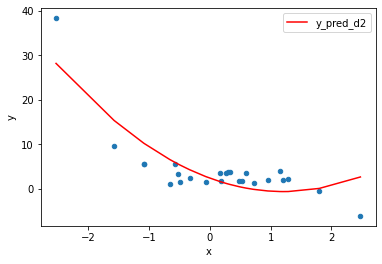

MSE: 15.843074399327886
RMSE: 3.9803359656350477
R2: 0.7171128702266937


In [19]:
polynomial_features= PolynomialFeatures(degree=2)

transformed_data = polynomial_features.fit_transform(data[["x"]])
transformed_data = pd.DataFrame(data=transformed_data, columns=['x0_d2', 'x1_d2', 'x2_d2'])
data = pd.concat([data, transformed_data], axis=1)

X = data[['x1_d2', 'x2_d2']] 
y = data['y']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

data['y_pred_d2'] = y_pred

f,ax0 = plt.subplots()
#ax1 = ax0.twinx()

data.plot(x='x', y='y', kind='scatter', ax=ax0)
data.sort_values(by='x').plot(x='x', y='y_pred_d2', kind='line', c='red', ax=ax0) # sort dstapoints

plt.show()

# Evaluate
mse = mean_squared_error(data['y'], data['y_pred_d2'])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(data['y'], data['y_pred_d2'])
print("R2:", r2)

## 1.5 Polynomial Regression (Degree = 10)
$ y = a_0 + a_1x + a_2x^2 + a_3x^3 + a_4x^4 + a_5x^5 + a_6x^6 + a_7x^7 + a_8x^8 + a_9x^9 + a_{10}x^{10}$

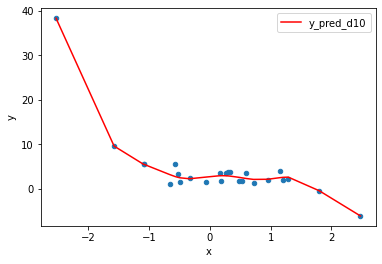

MSE: 1.0184004968599474
RMSE: 1.0091583110988818
R2: 0.9723672498549977


In [20]:
polynomial_features= PolynomialFeatures(degree=10)

transformed_data = polynomial_features.fit_transform(data[["x"]])
transformed_data = pd.DataFrame(data=transformed_data, columns=['x0_d10', 'x1_d10', 'x2_d10', 'x3_d10', 
                                                                'x4_d10', 'x5_d10', 'x6_d10', 'x7_d10', 
                                                                'x8_d10', 'x9_d10', 'x10_d10'])
data = pd.concat([data, transformed_data], axis=1)

data[['x0_d10', 'x1_d10', 'x2_d10', 'x3_d10', 'x4_d10', 'x5_d10', 'x6_d10', 'x7_d10', 
         'x8_d10', 'x9_d10', 'x10_d10']] = polynomial_features.fit_transform(data[["x"]])

X = data[['x1_d10', 'x2_d10', 'x3_d10', 'x4_d10', 'x5_d10', 
          'x6_d10', 'x7_d10', 'x8_d10', 'x9_d10', 'x10_d10']] 
y = data['y']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

data['y_pred_d10'] = y_pred

f,ax0 = plt.subplots()
#ax1 = ax0.twinx()

data.plot(x='x', y='y', kind='scatter', ax=ax0)
data.sort_values(by='x').plot(x='x', y='y_pred_d10', kind='line', c='red', ax=ax0) # sort dstapoints

plt.show()

# Evaluate
mse = mean_squared_error(data['y'], data['y_pred_d10'])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(data['y'], data['y_pred'])
print("R2:", r2)

In [21]:
data[['x', 'y', 'y_pred', 'y_pred_d2', 'y_pred_d10']].head()

,x,y,y_pred,y_pred_d2,y_pred_d10
0,1.799869,-0.446853,0.663564,0.061875,-0.462747
1,-2.531787,38.325933,37.385593,28.171761,38.325853
2,0.271144,3.443442,2.223591,1.175609,2.900647
3,-0.524340,3.248652,2.478602,5.555140,2.552616
4,-0.067682,1.584998,1.952495,2.723004,2.609341


## 1.6 Overfitting and Underfitting

<AxesSubplot:xlabel='x', ylabel='y'>

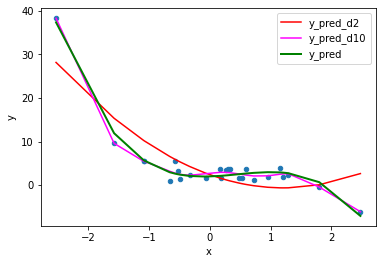

In [22]:
f,ax0 = plt.subplots()
#ax1 = ax0.twinx()

data.plot(x='x', y='y', kind='scatter', ax=ax0) 
data.sort_values(by='x').plot(x='x', y='y_pred_d2', kind='line', c='red', ax=ax0)
data.sort_values(by='x').plot(x='x', y='y_pred_d10', kind='line', c='magenta', ax=ax0) 
data.sort_values(by='x').plot(x='x', y='y_pred', kind='line', c='green', linewidth=2, ax=ax0)

<hr>

# 2. Wine Quality Data set


## 2.1 Load and Clean Dataset

In [23]:
#file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
file_name = "https://raw.githubusercontent.com/SumuduTennakoon/MachineLearningFoundations/main/Datasets/wine_quality.csv"

# Load CSV File
data = pd.read_csv(file_name, sep=';')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6501 entries, 0 to 6500
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sample id             6501 non-null   object 
 1   fixed acidity         6501 non-null   float64
 2   volatile acidity      6501 non-null   float64
 3   citric acid           6501 non-null   float64
 4   residual sugar        6501 non-null   float64
 5   chlorides             6501 non-null   float64
 6   free sulfur dioxide   6501 non-null   float64
 7   total sulfur dioxide  6501 non-null   float64
 8   density               6500 non-null   float64
 9   pH                    6500 non-null   float64
 10  sulphates             6500 non-null   float64
 11  alcohol               6500 non-null   float64
 12  quality               6501 non-null   int64  
 13  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 711.2+ KB


### Treat Duplicates

In [24]:
data.loc[data.duplicated(keep=False)]

,sample id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
574,W575,7.4,0.20,0.33,1.9,0.035,39.0,138.0,0.9910,3.17,0.44,11.7,7,white
575,W575,7.4,0.20,0.33,1.9,0.035,39.0,138.0,0.9910,3.17,0.44,11.7,7,white
744,W744,5.9,0.26,0.25,12.5,0.034,38.0,152.0,0.9977,3.33,0.43,9.4,5,white
745,W744,5.9,0.26,0.25,12.5,0.034,38.0,152.0,0.9977,3.33,0.43,9.4,5,white
5578,R679,8.3,0.78,0.10,2.6,0.081,45.0,87.0,0.9983,3.48,0.53,10.0,5,red
5579,R679,8.3,0.78,0.10,2.6,0.081,45.0,87.0,0.9983,3.48,0.53,10.0,5,red


#### Drop Duplicate Rows

In [25]:
data.drop_duplicates(keep='first', inplace=True)

# Verify
data.loc[data.duplicated(keep=False)]

,sample id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


### Treat Missing Values

In [26]:
data.isnull()

,sample id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6496,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6497,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6498,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6499,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
data.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
6496    False
6497    False
6498    False
6499    False
6500    False
Length: 6498, dtype: bool

In [28]:
data.loc[data.isnull().any(axis=1)]

,sample id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
17,W18,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8,NaN
2788,W2787,8.0,0.30,0.36,11.0,0.034,8.0,70.0,0.99354,3.05,0.41,12.2,6,NaN
5233,R334,8.4,0.56,0.08,2.1,0.105,16.0,44.0,0.99580,3.13,0.52,11.0,5,NaN
5260,R361,8.2,0.70,0.23,2.0,0.099,14.0,81.0,0.99730,3.19,0.70,9.4,5,NaN
6485,R1585,6.7,0.32,0.44,2.4,0.061,24.0,34.0,NaN,NaN,NaN,NaN,7,red


In [29]:
data['type'].value_counts()

white    4896
red      1598
Name: type, dtype: int64

#### Treat Missing Values in the 'type' column

In [30]:
data.loc[data.isnull().any(axis=1), 'type']=np.where(data.loc[data.isnull().any(axis=1), 'sample id'].str[0]=='R', 'red','white')

data.loc[data.isnull().any(axis=1)]

,sample id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6485,R1585,6.7,0.32,0.44,2.4,0.061,24.0,34.0,NaN,NaN,NaN,NaN,7,red


In [31]:
data['type'].value_counts()

white    4898
red      1600
Name: type, dtype: int64

#### Drop Rows with Missing Feature Values (Chemical test Results)

In [32]:
data.dropna(axis=0, how='any', inplace=True)

data.loc[data.isnull().any(axis=1)]

,sample id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


## 2.2 Exploring Dataset and Feature Engineering

In [33]:
data.sample(10)

,sample id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1964,W1963,8.2,0.21,0.48,1.4,0.041,11.0,99.0,0.99580,3.17,0.57,9.9,5,white
2350,W2349,8.3,0.26,0.31,2.0,0.029,14.0,141.0,0.99077,2.95,0.77,12.2,6,white
3291,W3290,6.6,0.28,0.42,8.2,0.044,60.0,196.0,0.99562,3.14,0.48,9.4,5,white
2319,W2318,7.5,0.24,0.62,10.6,0.045,51.0,153.0,0.99779,3.16,0.44,8.8,5,white
5446,R547,7.5,0.55,0.24,2.0,0.078,10.0,28.0,0.99830,3.45,0.78,9.5,6,red
1973,W1972,6.3,0.41,0.30,3.2,0.030,49.0,164.0,0.99270,3.53,0.79,11.7,7,white
2643,W2642,6.1,0.15,0.35,15.8,0.042,55.0,158.0,0.99642,3.24,0.37,10.6,5,white
3292,W3291,7.8,0.25,0.37,1.0,0.043,10.0,80.0,0.99128,3.08,0.38,11.4,5,white
2403,W2402,9.2,0.16,0.49,2.0,0.044,18.0,107.0,0.99514,3.10,0.53,10.2,4,white
5015,R116,9.4,0.40,0.31,2.2,0.090,13.0,62.0,0.99660,3.07,0.63,10.5,6,red


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6500
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sample id             6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 761.4+ KB


### Descriptive Statistics

In [35]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sample id,6497,6497,W1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fixed acidity,6497.0,NaN,NaN,NaN,7.215307,1.296434,3.8,6.4,7.0,7.7,15.9
volatile acidity,6497.0,NaN,NaN,NaN,0.339666,0.164636,0.08,0.23,0.29,0.4,1.58
citric acid,6497.0,NaN,NaN,NaN,0.318633,0.145318,0.0,0.25,0.31,0.39,1.66
residual sugar,6497.0,NaN,NaN,NaN,5.443235,4.757804,0.6,1.8,3.0,8.1,65.8
chlorides,6497.0,NaN,NaN,NaN,0.056034,0.035034,0.009,0.038,0.047,0.065,0.611
free sulfur dioxide,6497.0,NaN,NaN,NaN,30.525319,17.7494,1.0,17.0,29.0,41.0,289.0
total sulfur dioxide,6497.0,NaN,NaN,NaN,115.744574,56.521855,6.0,77.0,118.0,156.0,440.0
density,6497.0,NaN,NaN,NaN,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,NaN,NaN,NaN,3.218501,0.160787,2.72,3.11,3.21,3.32,4.01


### Encoding 'type' column (convert to binary)

In [36]:
data.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [37]:
data['type_num'] = np.where(data['type']=='red', 0 , 1)
data.groupby(['type', 'type_num'])['quality'].count()

type   type_num
red    0           1599
white  1           4898
Name: quality, dtype: int64

### Pair Plot

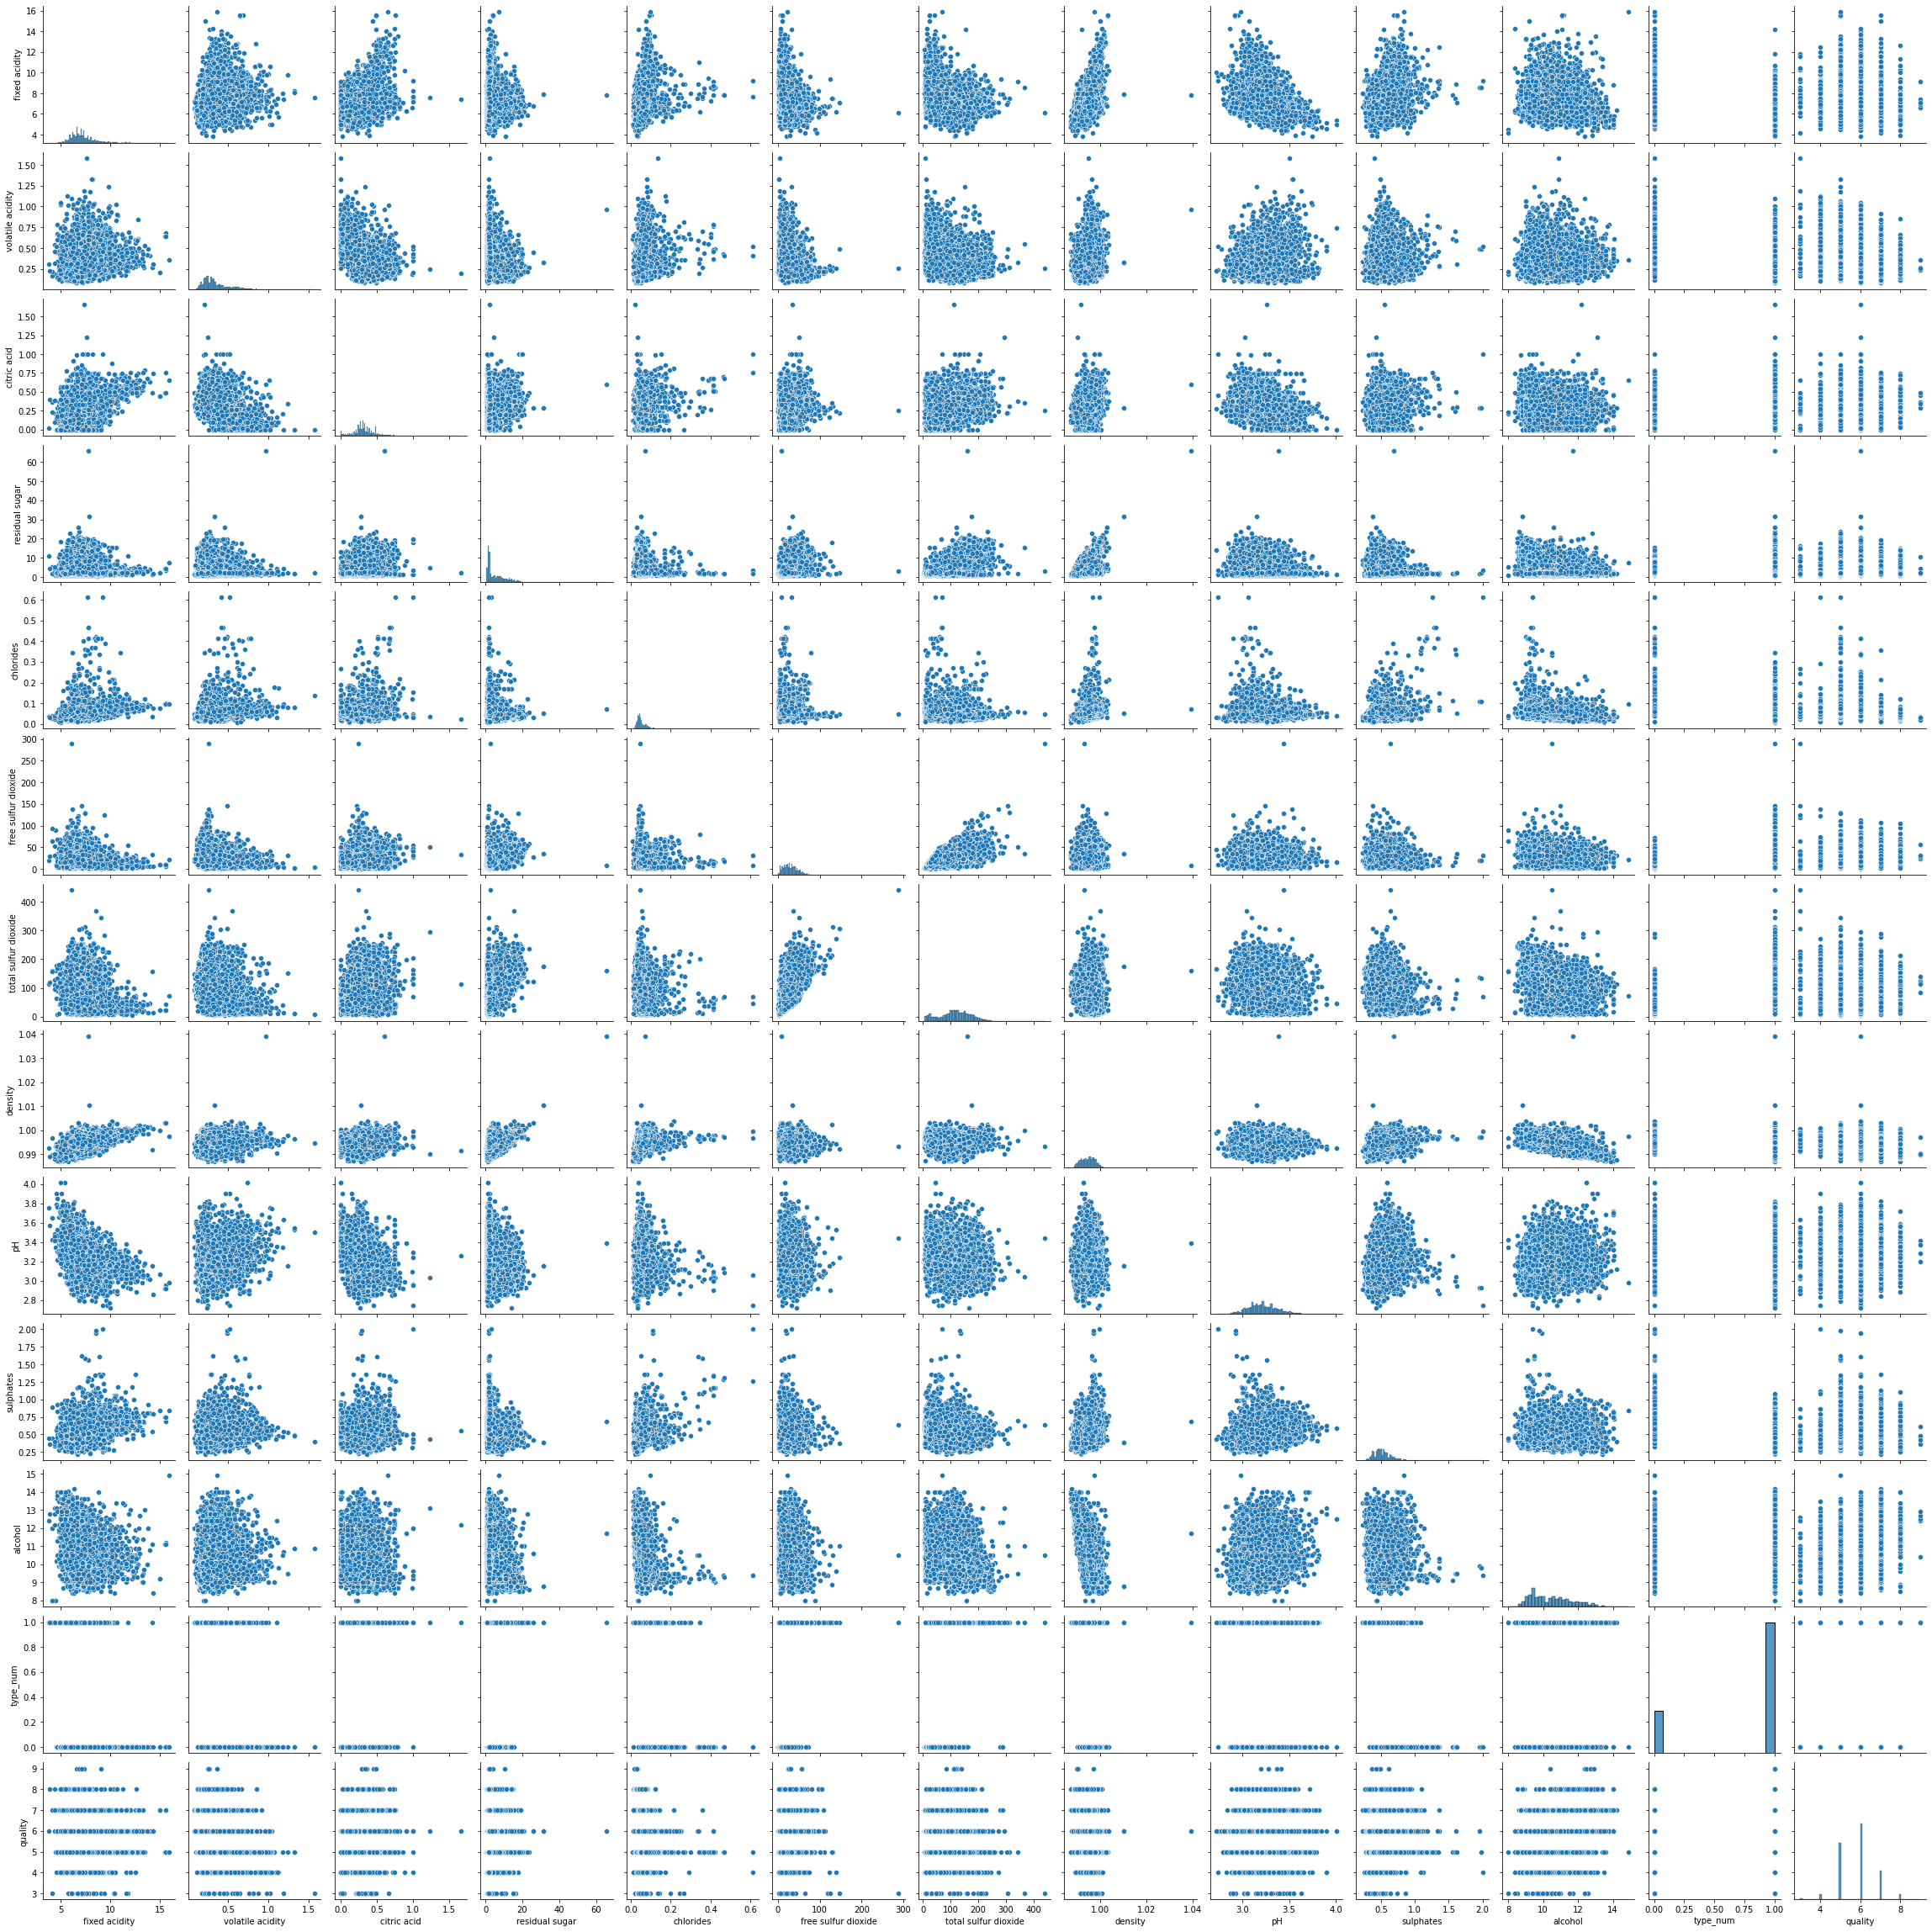

In [38]:
sns.pairplot(data[[ 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type_num', 'quality']])
plt.show()

### Correlation Matrix

In [39]:
correlation_matrix = data[[ 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type_num', 'quality']].corr()
       
correlation_matrix.style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_num,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.486740,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.653036,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.187397,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,0.348821,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.512678,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.471644,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,0.700357,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.390645,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,-0.329129,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,-0.487218,0.038485


<AxesSubplot:>

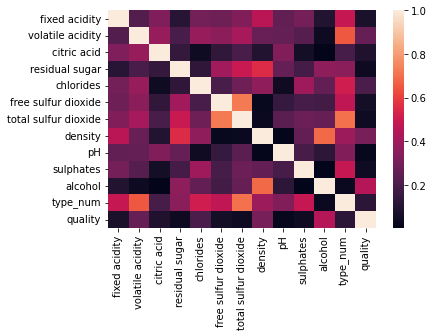

In [40]:
sns.heatmap(correlation_matrix.abs())

## 2.4 Train-Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_labels = [ 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type_num'
    ]
    
y_label = 'quality'
       
X_train, X_test, y_train, y_test = train_test_split(data[X_labels], data[y_label], test_size=0.3, random_state=42)

In [43]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_num
3763,6.1,0.17,0.28,2.5,0.028,22.0,98.0,0.99072,3.16,0.37,11.1,1
3742,7.0,0.15,0.28,14.7,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,1
1361,6.5,0.19,0.32,1.4,0.040,31.0,132.0,0.99220,3.36,0.54,10.8,1
1232,7.3,0.29,0.30,13.0,0.043,46.0,238.0,0.99860,3.06,0.41,8.7,1
4753,7.3,0.36,0.62,7.1,0.033,48.0,185.0,0.99472,3.14,0.62,10.6,1


In [44]:
y_train.head()

3763    7
3742    7
1361    7
1232    6
4753    6
Name: quality, dtype: int64

#  3. Linear Regression: Ordinary Least Squares (OLS) Linear Regression.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegressionhttps://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

## 3.1 Create Linear Regression Model Object

In [45]:
from sklearn import linear_model

In [46]:
model = linear_model.LinearRegression()
print(model)

LinearRegression()


## 3.2 Select The Feature with Heighest Correlation With Target (y)

In [47]:
y_label = 'quality'
y_predict_label = 'prected_quality'
correlation_matrix[y_label].sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
type_num                0.119323
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [48]:
# Seelct variables
X_labels = ['alcohol']

## 3.3 Train Model with One Variable

In [49]:
#Fit
model.fit(X_train[X_labels], y_train)

#Find model parameters
coefficients = model.coef_
intercept = model.intercept_

print(pd.DataFrame(data={'features':X_labels, 'coefficients':coefficients}))
print('\n') # Add new line to print
print(F"Intercept = {intercept}")

  features  coefficients
0  alcohol      0.323208


Intercept = 2.423879371348139


## 3.4 Predict

In [50]:
result = pd.DataFrame(y_test) # Convert Series to a DataFrame
result[y_predict_label] = model.predict(X_test[X_labels])

result['abs_difference'] = (result[y_label] - result[y_predict_label]).abs()
result[[y_label, y_predict_label, 'abs_difference']]

,quality,prected_quality,abs_difference
3105,7,6.270059,0.729941
1421,7,5.914529,1.085471
4763,6,5.365075,0.634925
4692,6,5.332754,0.667246
4034,5,5.397396,0.397396
...,...,...,...
4296,5,5.914529,0.914529
3759,5,5.882209,0.882209
5957,7,6.334700,0.665300
4420,6,5.268113,0.731887


In [51]:
result['abs_difference'].describe()

count    1950.000000
mean        0.607492
std         0.454694
min         0.004669
25%         0.332754
50%         0.494359
75%         0.731887
max         3.140775
Name: abs_difference, dtype: float64

## 3.5 Evaluate Model

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
mse = mean_squared_error(result[y_label], result[y_predict_label])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_label], result[y_predict_label])
print("R2:", r2)

MSE: 0.575687378311474
RMSE: 0.7587406528659671
R2: 0.21081029173400656


## 3.6 Improve Model (2nd Iteration)

In [54]:
y_label = 'quality'
y_predict_label = 'prected_quality'
correlation_matrix[y_label].sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
type_num                0.119323
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [55]:
# Seelct variables
X_labels = ['alcohol', 'volatile acidity']

# Fit
model.fit(X_train[X_labels], y_train)

#Find model parameters
coefficients = model.coef_
intercept = model.intercept_

print(pd.DataFrame(data={'features':X_labels, 'coefficients':coefficients}))
print('\n') # Add new line to print
print(F"Intercept = {intercept}")

result = pd.DataFrame(y_test) # Convert Series to a DataFrame
result[y_predict_label] = model.predict(X_test[X_labels])

mse = mean_squared_error(result[y_label], result[y_predict_label])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_label], result[y_predict_label])
print("R2:", r2)

           features  coefficients
0           alcohol      0.314904
1  volatile acidity     -1.274983


Intercept = 2.945297635417744
MSE: 0.5229085623317428
RMSE: 0.7231241679903547
R2: 0.2831629260888502


## 3.7 Keep Improving Model (3rd Iteration)

In [56]:
y_label = 'quality'
y_predict_label = 'prected_quality'
correlation_matrix[y_label].sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
type_num                0.119323
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [57]:
# Index of a Series object
correlation_matrix[y_label].abs().sort_values().index

Index(['pH', 'residual sugar', 'sulphates', 'total sulfur dioxide',
       'free sulfur dioxide', 'fixed acidity', 'citric acid', 'type_num',
       'chlorides', 'volatile acidity', 'density', 'alcohol', 'quality'],
      dtype='object')

In [58]:
# Seelct variables
X_labels = ['alcohol', 'volatile acidity', 'sulphates']

# Fit
model.fit(X_train[X_labels], y_train)

#Find model parameters
coefficients = model.coef_
intercept = model.intercept_

print(pd.DataFrame(data={'features':X_labels, 'coefficients':coefficients}))
print('\n') # Add new line to print
print(F"Intercept = {intercept}")

result = pd.DataFrame(y_test) # Convert Series to a DataFrame
result[y_predict_label] = model.predict(X_test[X_labels])

mse = mean_squared_error(result[y_label], result[y_predict_label])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_label], result[y_predict_label])
print("R2:", r2)

           features  coefficients
0           alcohol      0.315008
1  volatile acidity     -1.405076
2         sulphates      0.625866


Intercept = 2.654567190692642
MSE: 0.5181502159017869
RMSE: 0.7198265179206632
R2: 0.2896859769187985


## 3.8 Keep Improving Model (Final Iteration)

In [59]:
# Seelct variables
X_labels = ['fixed acidity',
       'chlorides', 'density', 'total sulfur dioxide', 'citric acid',
       'sulphates', 'volatile acidity', 'alcohol', 'type_num']

model = linear_model.LinearRegression()

# Fit
model.fit(X_train[X_labels], y_train)

#Find model parameters
coefficients = model.coef_
intercept = model.intercept_

print(pd.DataFrame(data={'features':X_labels, 'coefficients':coefficients}))
print('\n') # Add new line to print
print(F"Intercept = {intercept}")

result = pd.DataFrame(y_test) # Convert Series to a DataFrame
result[y_predict_label] = model.predict(X_test[X_labels])

mse = mean_squared_error(result[y_label], result[y_predict_label])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_label], result[y_predict_label])
print("R2:", r2)

               features  coefficients
0         fixed acidity     -0.034821
1             chlorides     -0.969581
2               density     37.624137
3  total sulfur dioxide     -0.000146
4           citric acid     -0.120674
5             sulphates      0.520704
6      volatile acidity     -1.653354
7               alcohol      0.366708
8              type_num     -0.106661


Intercept = -34.73020613414543
MSE: 0.5128065861558929
RMSE: 0.7161051502090269
R2: 0.2970113721925539


## 3.9 Tracking Model Evaluation Results

In [60]:
model_eval = []
model_eval.append({'model_name':'OLS', 'model':model, 'X_labels':X_labels, 'MSE':mse, 'RMSE': rmse, 'R2':r2})

## 3.10 Predicted vs. Actual

<AxesSubplot:xlabel='quality', ylabel='prected_quality'>

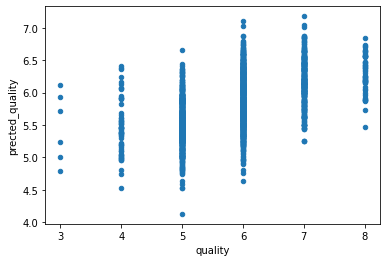

In [61]:
result.plot(kind='scatter', x=y_label, y=y_predict_label)

## 3.11 Feature Scaling (Normalization and Standerdization)

# 4. Ridge Rigression
### Linear least squares with l2 regularization.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

### 4.1 Select variables

In [62]:
X_labels = ['fixed acidity',
       'chlorides', 'density', 'total sulfur dioxide', 'citric acid',
       'sulphates', 'volatile acidity', 'alcohol', 'type_num']

y_label = 'quality'

### 4.2 Create Model Object
* alpha: Constant that multiplies the L2 term, controlling regularization strength

In [63]:
from sklearn import linear_model

model = linear_model.Ridge(alpha=0.1)
model

Ridge(alpha=0.1)

### 4.3 Train Model

In [64]:
# Fit
model.fit(X_train[X_labels], y_train)

#Find model parameters
coefficients = model.coef_
intercept = model.intercept_

print(pd.DataFrame(data={'features':X_labels, 'coefficients':coefficients}))
print('\n') # Add new line to print
print(F"Intercept = {intercept}")

               features  coefficients
0         fixed acidity     -0.013786
1             chlorides     -1.062998
2               density      3.685595
3  total sulfur dioxide      0.000322
4           citric acid     -0.095033
5             sulphates      0.554167
6      volatile acidity     -1.617377
7               alcohol      0.316922
8              type_num     -0.196878


Intercept = -0.6203233046761376


### 4.4 Predict and Evaluate

In [65]:
result = pd.DataFrame(y_test) # Convert Series to a DataFrame
result[y_predict_label] = model.predict(X_test[X_labels])

mse = mean_squared_error(result[y_label], result[y_predict_label])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_label], result[y_predict_label])
print("R2:", r2)

MSE: 0.5150791006956287
RMSE: 0.7176901146704117
R2: 0.2938960614280475


### 4.5  Apped Model Evaluation Results

In [66]:
model_eval.append({'model_name':'RIDGE', 'model':model, 'X_labels':X_labels, 'MSE':mse, 'RMSE': rmse, 'R2':r2})

# 5. ElasticNet
### Linear regression with combined L1 and L2 priors as regularizer.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet

### 5.1 Select variables

In [67]:
X_labels = ['fixed acidity',
       'chlorides', 'density', 'total sulfur dioxide', 'citric acid',
       'sulphates', 'volatile acidity', 'alcohol', 'type_num']

y_label = 'quality'

### 5.2 Create Model Object
* alpha: Constant that multiplies the penalty terms. alpha=0 is alpha = 0 is equivalent to an ordinary least square
* l1_ratio: The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

In [68]:
from sklearn import linear_model

model = linear_model.ElasticNet(alpha=0.001, l1_ratio=0.5)
model

ElasticNet(alpha=0.001)

### 5.3 Train Model

In [69]:
# Fit
model.fit(X_train[X_labels], y_train)

#Find model parameters
coefficients = model.coef_
intercept = model.intercept_

print(pd.DataFrame(data={'features':X_labels, 'coefficients':coefficients}))
print('\n') # Add new line to print
print(F"Intercept = {intercept}")

               features  coefficients
0         fixed acidity     -0.011120
1             chlorides     -0.286744
2               density      0.000000
3  total sulfur dioxide      0.000310
4           citric acid     -0.058699
5             sulphates      0.495631
6      volatile acidity     -1.533324
7               alcohol      0.316040
8              type_num     -0.157731


Intercept = 2.9550681998605537


### 5.4 Predict and Evaluate

In [70]:
result = pd.DataFrame(y_test) # Convert Series to a DataFrame
result[y_predict_label] = model.predict(X_test[X_labels])

mse = mean_squared_error(result[y_label], result[y_predict_label])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_label], result[y_predict_label])
print("R2:", r2)

MSE: 0.5169558924392434
RMSE: 0.7189964481409095
R2: 0.2913232332153399


### 5.5  Apped Model Evaluation Results

In [71]:
model_eval.append({'model_name':'ELASTIC', 'model':model, 'X_labels':X_labels, 'MSE':mse, 'RMSE': rmse, 'R2':r2})

# 6. Decision Tree Regressor

### 6.1 Select variables

In [72]:
X_labels = ['fixed acidity',
       'chlorides', 'density', 'total sulfur dioxide', 'citric acid',
       'sulphates', 'volatile acidity', 'alcohol', 'type_num']

y_label = 'quality'

### 6.2 Create Model Object

In [73]:
from sklearn.tree import DecisionTreeRegressor

model =  DecisionTreeRegressor(max_depth = 10)
model

DecisionTreeRegressor(max_depth=10)

### 6.3 Train Model

In [74]:
# Fit
model.fit(X_train[X_labels], y_train)

feature_importances = pd.DataFrame(data={'features':model.feature_names_in_, 
                                         'feature_importances': model.feature_importances_})

print(feature_importances.sort_values(by="feature_importances", ascending=False))

model.get_params()


               features  feature_importances
7               alcohol             0.340915
6      volatile acidity             0.175034
3  total sulfur dioxide             0.103996
5             sulphates             0.099514
1             chlorides             0.079153
0         fixed acidity             0.073573
4           citric acid             0.066946
2               density             0.060550
8              type_num             0.000320


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### 6.4 Predict and Evaluate

In [75]:
result = pd.DataFrame(y_test) # Convert Series to a DataFrame
result[y_predict_label] = model.predict(X_test[X_labels])

mse = mean_squared_error(result[y_label], result[y_predict_label])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_label], result[y_predict_label])
print("R2:", r2)

MSE: 0.6378224514169577
RMSE: 0.798637872516047
R2: 0.12563149146044572


### 6.5  Append Model Evaluation Results

In [76]:
model_eval.append({'model_name':'TREG', 'model':model, 'X_labels':X_labels, 'MSE':mse, 'RMSE': rmse, 'R2':r2})

# 7. Random Forest Regressor

### 7.1 Select variables

In [77]:
X_labels = ['fixed acidity',
       'chlorides', 'density', 'total sulfur dioxide', 'citric acid',
       'sulphates', 'volatile acidity', 'alcohol', 'type_num']

y_label = 'quality'

### 7.2 Create Model Object

In [78]:
from sklearn.ensemble import RandomForestRegressor

model =  RandomForestRegressor(n_estimators=100, max_depth=10)
model

RandomForestRegressor(max_depth=10)

### 7.3 Train Model

In [79]:
# Fit
model.fit(X_train[X_labels], y_train)

feature_importances = pd.DataFrame(data={'features':model.feature_names_in_, 
                                         'feature_importances': model.feature_importances_})

print(feature_importances.sort_values(by="feature_importances", ascending=False))

model.get_params()


               features  feature_importances
7               alcohol             0.340250
6      volatile acidity             0.171115
5             sulphates             0.100491
3  total sulfur dioxide             0.097473
2               density             0.077030
1             chlorides             0.072978
0         fixed acidity             0.071665
4           citric acid             0.067667
8              type_num             0.001331


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 7.4 Predict and Evaluate

In [80]:
result = pd.DataFrame(y_test) # Convert Series to a DataFrame
result[y_predict_label] = model.predict(X_test[X_labels])

mse = mean_squared_error(result[y_label], result[y_predict_label])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_label], result[y_predict_label])
print("R2:", r2)

MSE: 0.42202603082668455
RMSE: 0.6496353060192191
R2: 0.42145926296725933


### 7.5  Append Model Evaluation Results

In [81]:
model_eval.append({'model_name':'RFST', 'model':model, 'X_labels':X_labels, 'MSE':mse, 'RMSE': rmse, 'R2':r2})

# 8. Model Evaluation Results Comparison

In [82]:
model_eval_results = pd.DataFrame(model_eval)
model_eval_results

,model_name,model,X_labels,MSE,RMSE,R2
0,OLS,LinearRegression(),"[fixed acidity, chlorides, density, total sulf...",0.512807,0.716105,0.297011
1,RIDGE,Ridge(alpha=0.1),"[fixed acidity, chlorides, density, total sulf...",0.515079,0.717690,0.293896
2,ELASTIC,ElasticNet(alpha=0.001),"[fixed acidity, chlorides, density, total sulf...",0.516956,0.718996,0.291323
3,TREG,DecisionTreeRegressor(max_depth=10),"[fixed acidity, chlorides, density, total sulf...",0.637822,0.798638,0.125631
4,RFST,"(DecisionTreeRegressor(max_depth=10, max_featu...","[fixed acidity, chlorides, density, total sulf...",0.422026,0.649635,0.421459


<hr>
Last update 2021-10-16 by Sumudu Tennakoon

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.